In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1) Reading data:

In [3]:
data = pd.read_csv(r'D:\calories_burn\dataset\orginal_data\calories_burn.csv')

In [4]:
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
data.shape

(15000, 9)

firstly we must turn the user_id data type into object

In [7]:
data['User_ID'] = data['User_ID'].astype('object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  object 
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.0+ MB


### 2) EDA:

In [9]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
# chick the values in Gender column
data['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [12]:
data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


I will split the data depend on Gender, cause the calories burn for men is heigh than women, cause men have more muscle than women

In [13]:
male_data = data[data['Gender'] == 'male'].reset_index(drop = True)

In [14]:
male_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,11179863,male,69,179,79,5,88,38.7,26
2,11117088,male,41,175,85,25,100,40.7,143
3,12132339,male,60,186,94,21,97,40.4,134
4,15566424,male,66,171,79,11,90,40.0,58
...,...,...,...,...,...,...,...,...,...
7442,10050978,male,51,181,87,9,91,39.6,44
7443,14722670,male,27,170,70,13,92,40.1,46
7444,13584585,male,45,179,78,11,98,39.9,60
7445,18643037,male,78,193,97,2,84,38.3,11


In [15]:
female_data = data[data['Gender'] == 'female'].reset_index(drop = True)

In [16]:
female_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14861698,female,20,166,60,14,94,40.3,66
1,16180408,female,34,179,71,13,100,40.5,71
2,17771927,female,27,154,58,10,81,39.8,35
3,15130815,female,36,151,50,23,96,40.7,123
4,19602372,female,33,158,56,22,95,40.5,112
...,...,...,...,...,...,...,...,...,...
7548,19715870,female,22,190,79,19,96,40.3,89
7549,18209611,female,48,159,57,10,94,39.8,52
7550,15644082,female,20,193,86,11,92,40.4,45
7551,17212577,female,27,165,65,6,85,39.2,23


Now I'll deal with each one alone, then when I clean each one and prepare it I'll combine it to gather as a one df

let's start with male data :)

In [17]:
male_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7447 entries, 0 to 7446
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     7447 non-null   object 
 1   Gender      7447 non-null   object 
 2   Age         7447 non-null   int64  
 3   Height      7447 non-null   int64  
 4   Weight      7447 non-null   int64  
 5   Duration    7447 non-null   int64  
 6   Heart_Rate  7447 non-null   int64  
 7   Body_Temp   7447 non-null   float64
 8   Calories    7447 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 523.7+ KB


In [18]:
male_data.shape

(7447, 9)

In [19]:
male_data.iloc[:, :(data.shape[1] -1)].describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000
mean,42.844904,184.667517,86.825702,15.559420,95.630052,40.031153
std,17.022752,9.976179,10.180943,8.286255,9.564614,0.773619
min,20.000000,142.000000,54.000000,1.000000,67.000000,37.200000
25%,28.000000,178.000000,80.000000,8.000000,88.500000,39.600000
50%,39.000000,185.000000,87.000000,15.000000,96.000000,40.200000
75%,56.000000,191.000000,93.000000,23.000000,103.000000,40.600000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


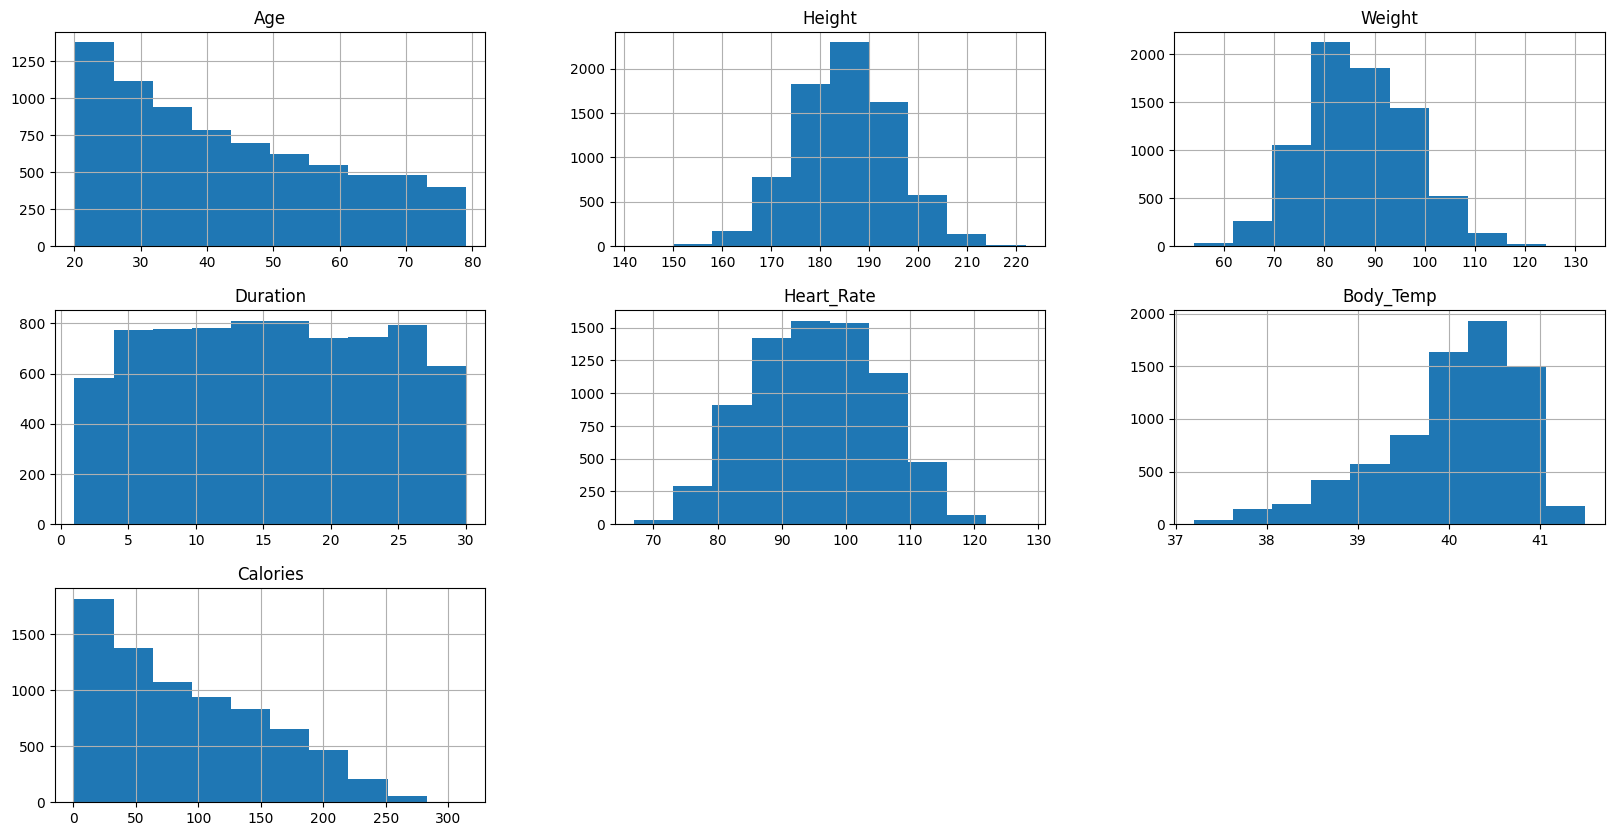

In [20]:
# see the distribution of the data
male_data.hist(figsize=(20, 10))
plt.show()

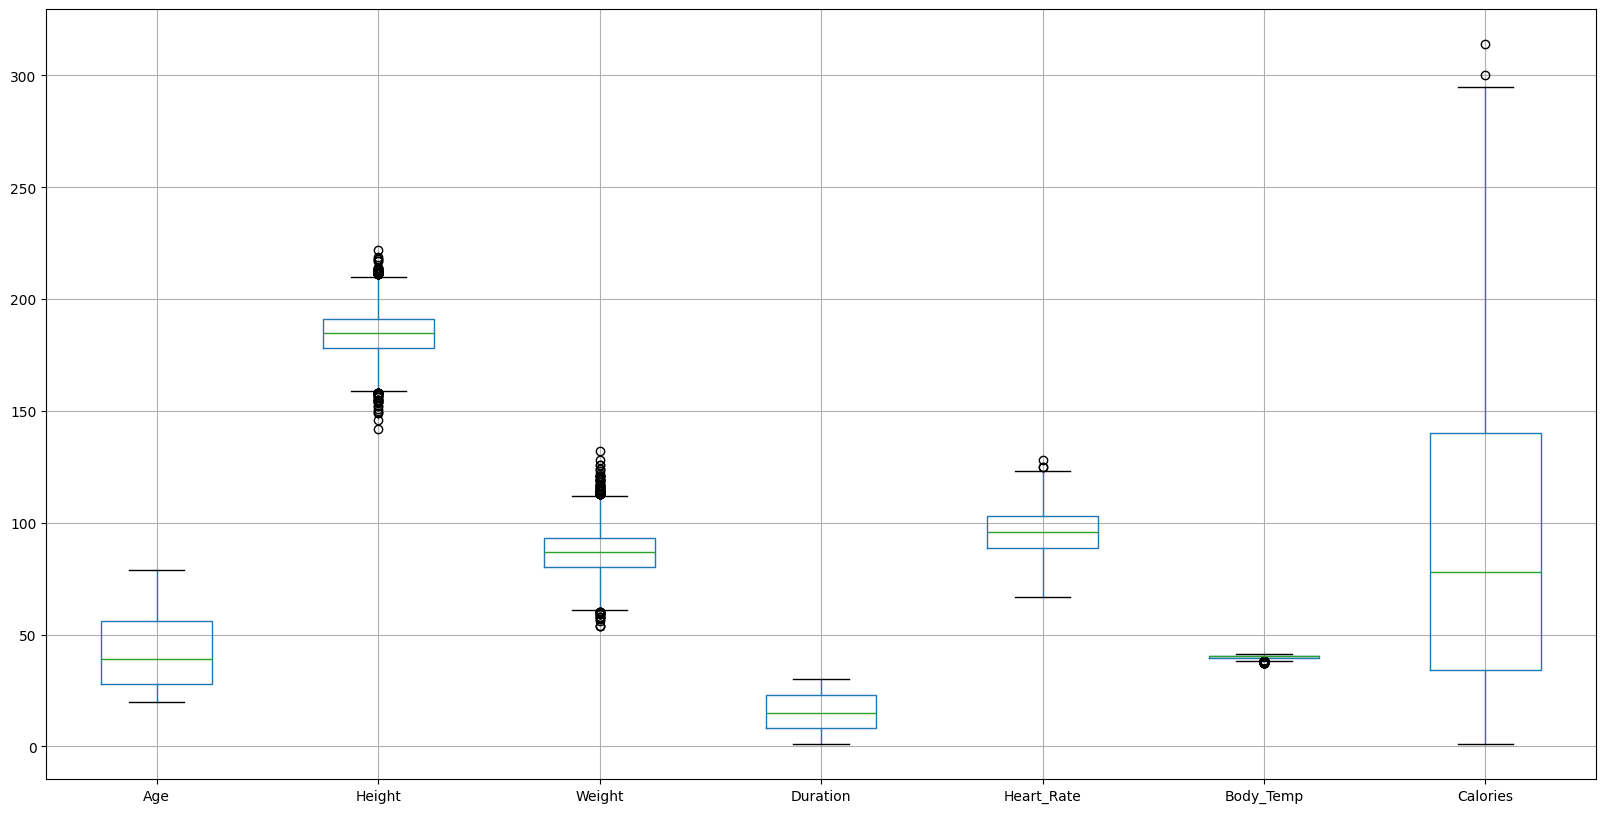

In [21]:
male_data.boxplot(figsize=(20, 10))
plt.show()

In [22]:
# then for outlier we'll turn it to nulls 
for column in male_data.columns:
    if column != 'Calories' and male_data[column].dtype != object:
        q1 = male_data[column].quantile(0.25)
        q3 = male_data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        male_data[column] = male_data[column].apply(lambda x : np.nan if x < lower_bound or x > upper_bound else x)

In [23]:
male_data.isnull().sum()

User_ID         0
Gender          0
Age             0
Height         70
Weight         84
Duration        0
Heart_Rate      3
Body_Temp     182
Calories        0
dtype: int64

In [24]:
for column in male_data.columns:
    if column != 'Calories' and male_data[column].dtype != object:
        male_data[column].fillna(male_data[column].median(), inplace = True)

In [25]:
male_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

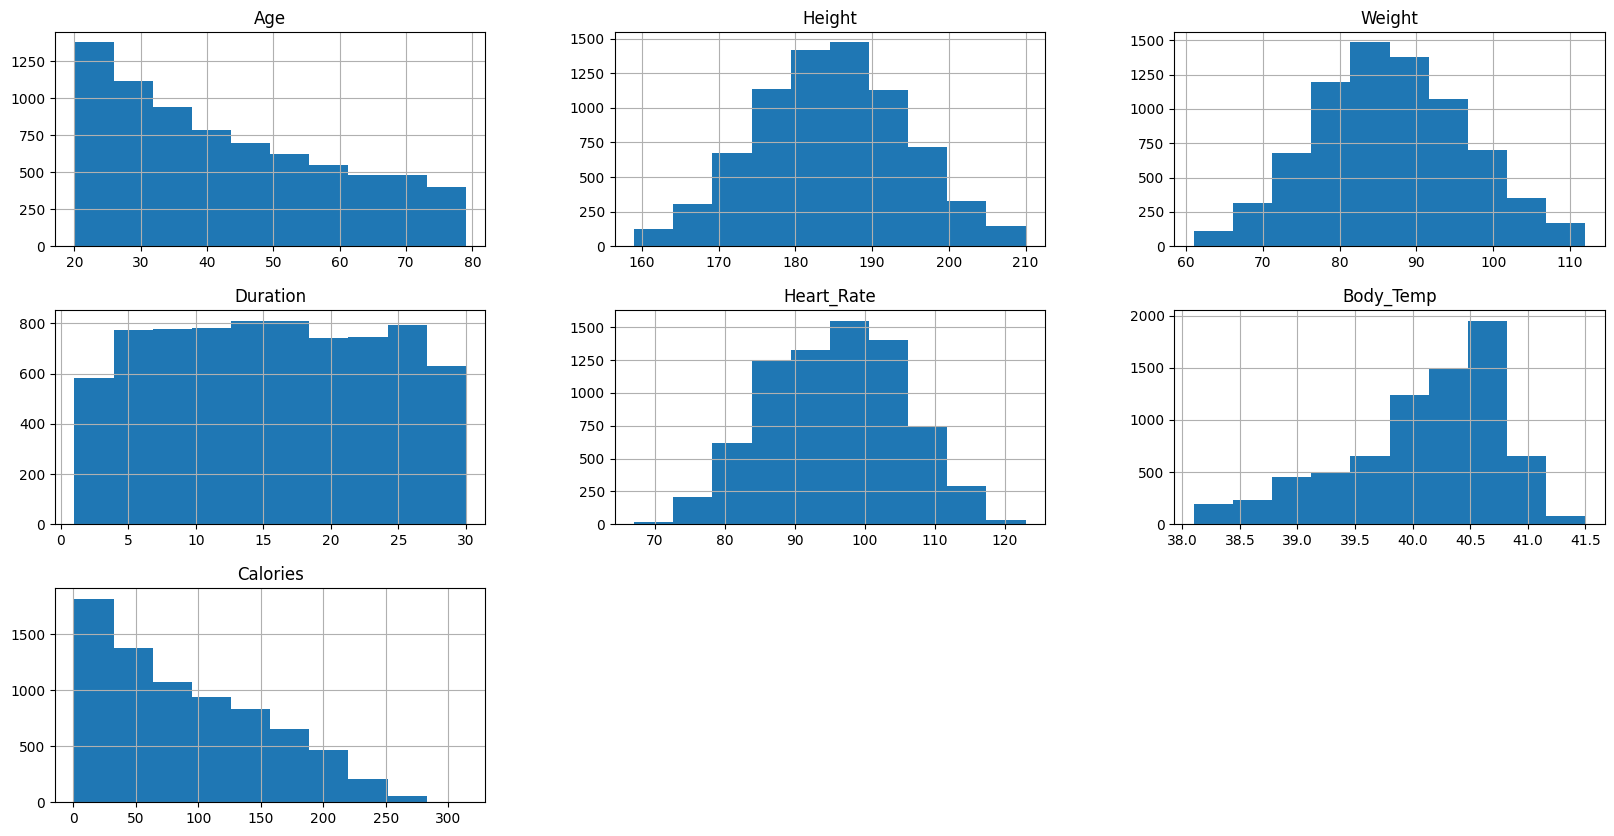

In [26]:
# see the distribution of the data
male_data.hist(figsize=(20, 10))
plt.show()

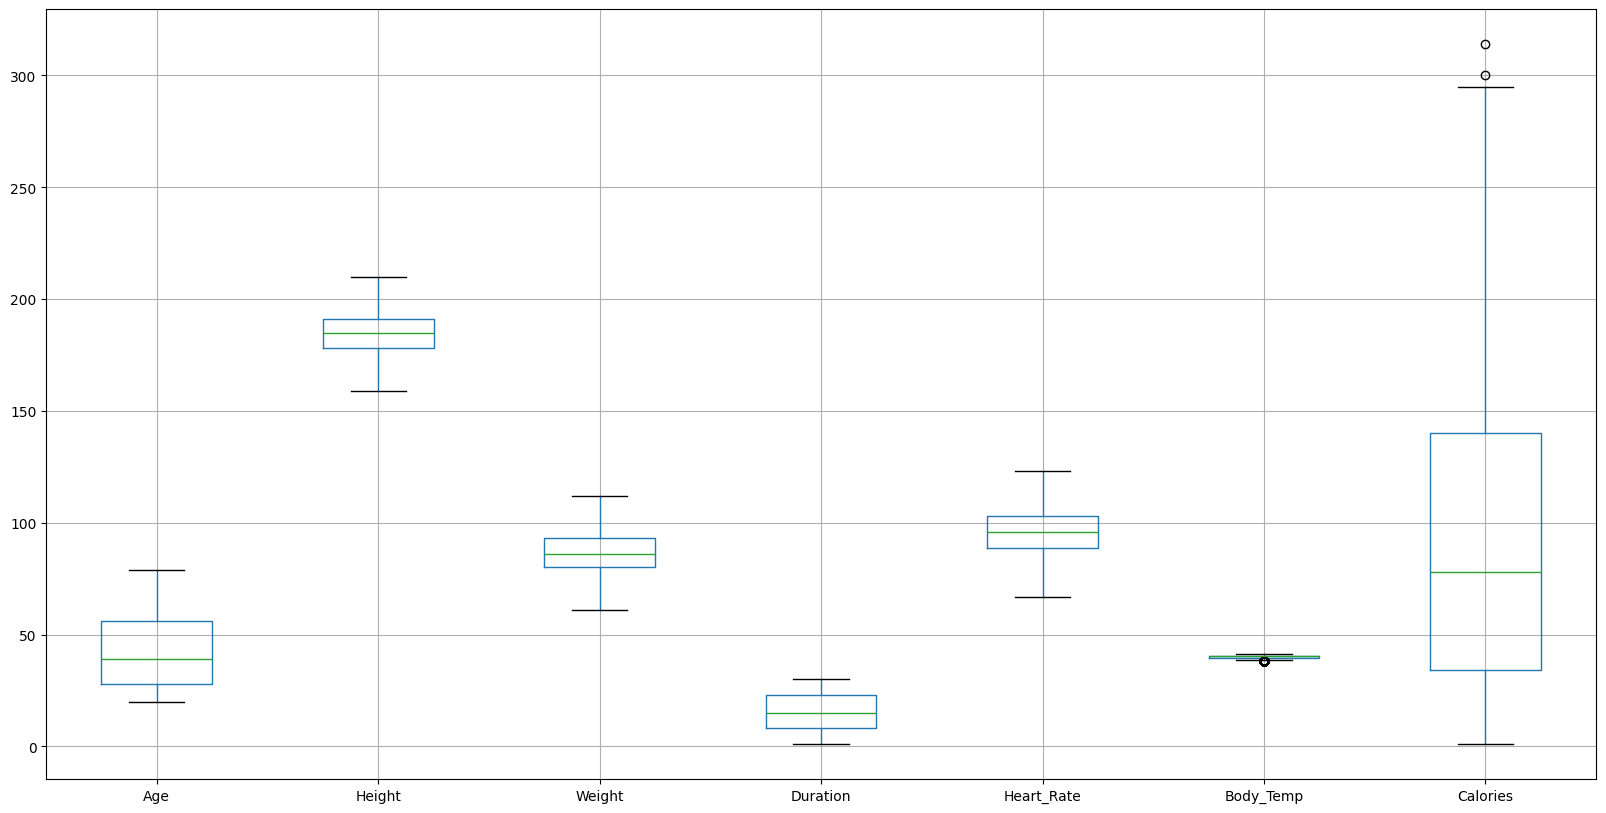

In [27]:
male_data.boxplot(figsize=(20, 10))
plt.show()

Now I will start study and clean female data

In [28]:
female_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7553 entries, 0 to 7552
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     7553 non-null   object 
 1   Gender      7553 non-null   object 
 2   Age         7553 non-null   int64  
 3   Height      7553 non-null   int64  
 4   Weight      7553 non-null   int64  
 5   Duration    7553 non-null   int64  
 6   Heart_Rate  7553 non-null   int64  
 7   Body_Temp   7553 non-null   float64
 8   Calories    7553 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 531.2+ KB


In [29]:
female_data.shape

(7553, 9)

In [30]:
female_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000
mean,42.735469,164.405931,63.274460,15.502185,95.408579,40.019833,88.153052
std,16.939220,10.089177,8.449548,8.352013,9.601109,0.784733,58.586980
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,2.000000
25%,28.000000,158.000000,57.000000,8.000000,88.000000,39.600000,36.000000
50%,40.000000,164.000000,63.000000,16.000000,95.000000,40.200000,80.000000
75%,56.000000,171.000000,69.000000,23.000000,103.000000,40.600000,135.000000
max,79.000000,205.000000,101.000000,30.000000,122.000000,41.500000,240.000000


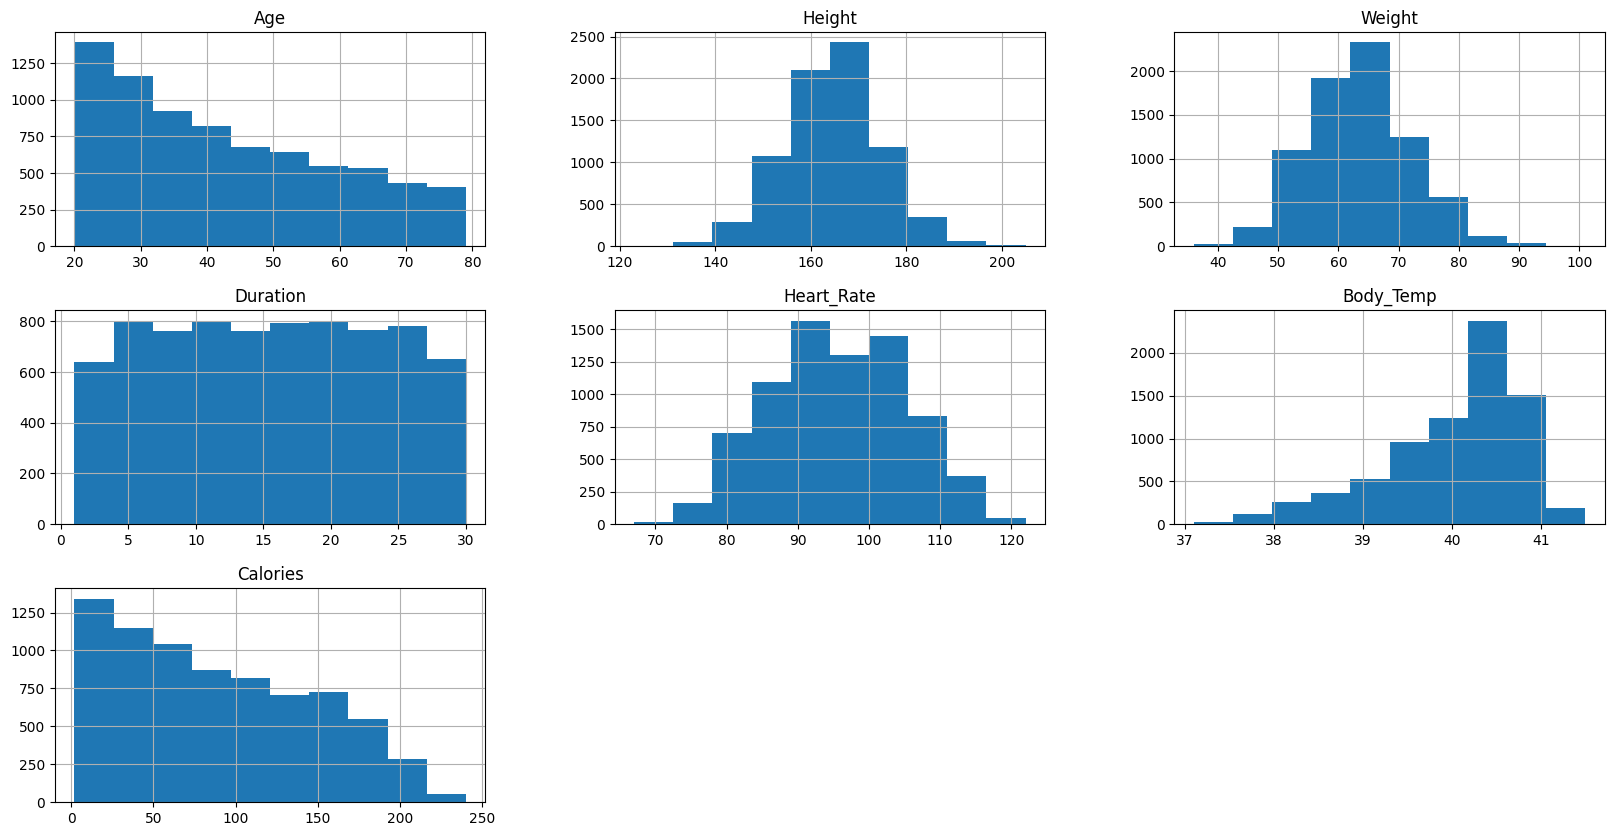

In [31]:
# see the distribution of the data
female_data.hist(figsize=(20, 10))
plt.show()

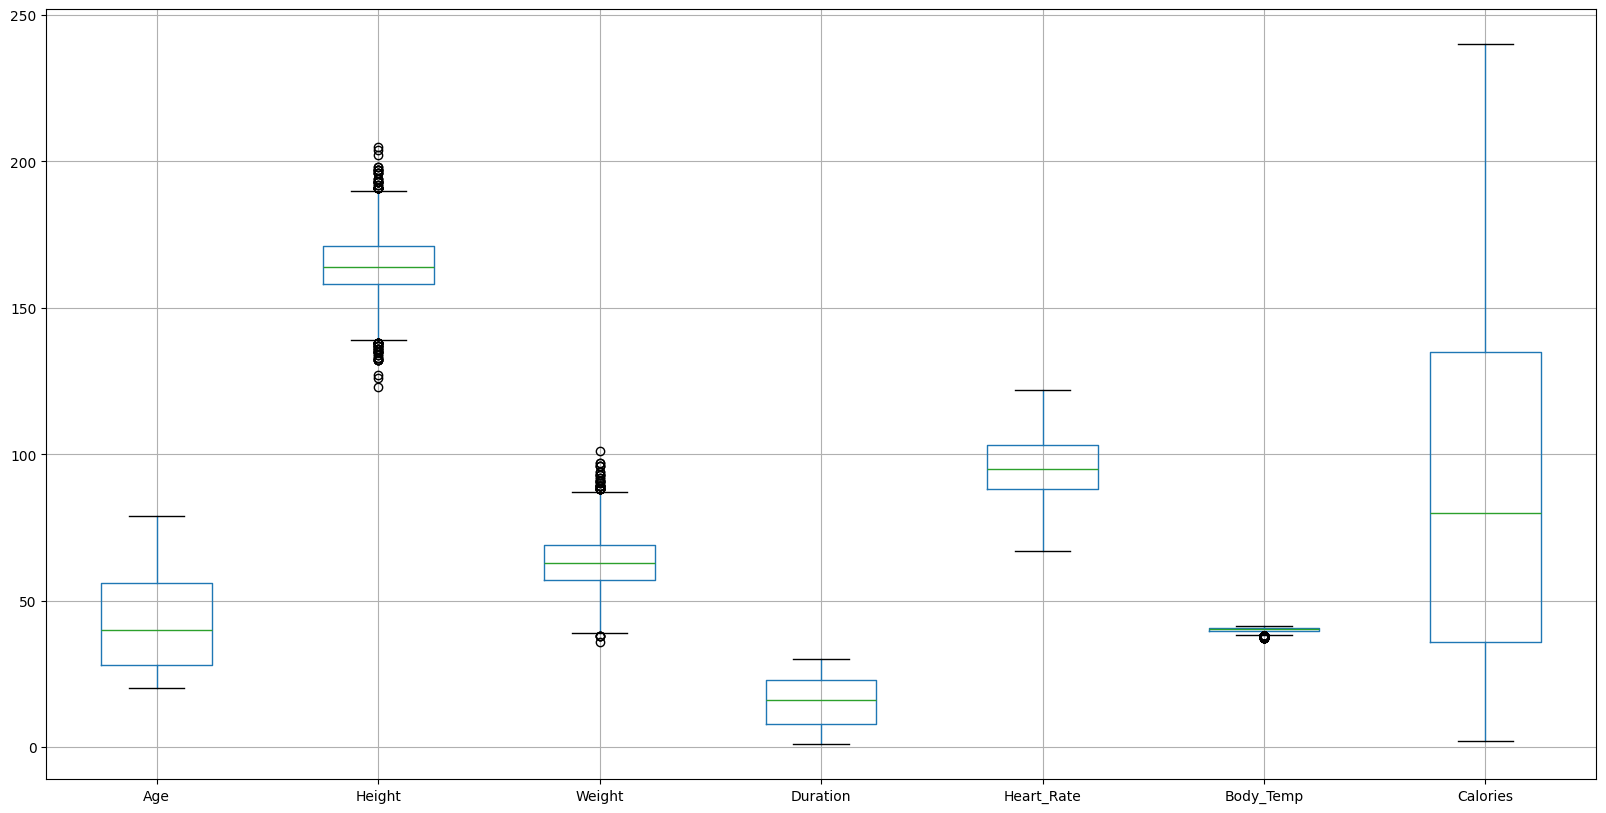

In [32]:
female_data.boxplot(figsize=(20, 10))
plt.show()

In [33]:
# then for outlier we'll turn it to nulls 
for column in female_data.columns:
    if column != 'Calories' and female_data[column].dtype != object:
        q1 = female_data[column].quantile(0.25)
        q3 = female_data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        female_data[column] = female_data[column].apply(lambda x : np.nan if x < lower_bound or x > upper_bound else x)

In [34]:
female_data.isnull().sum()

User_ID         0
Gender          0
Age             0
Height         81
Weight         43
Duration        0
Heart_Rate      0
Body_Temp     187
Calories        0
dtype: int64

In [35]:
for column in female_data.columns:
    if column != 'Calories' and female_data[column].dtype != object:
        female_data[column].fillna(female_data[column].median(), inplace = True)

In [36]:
female_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

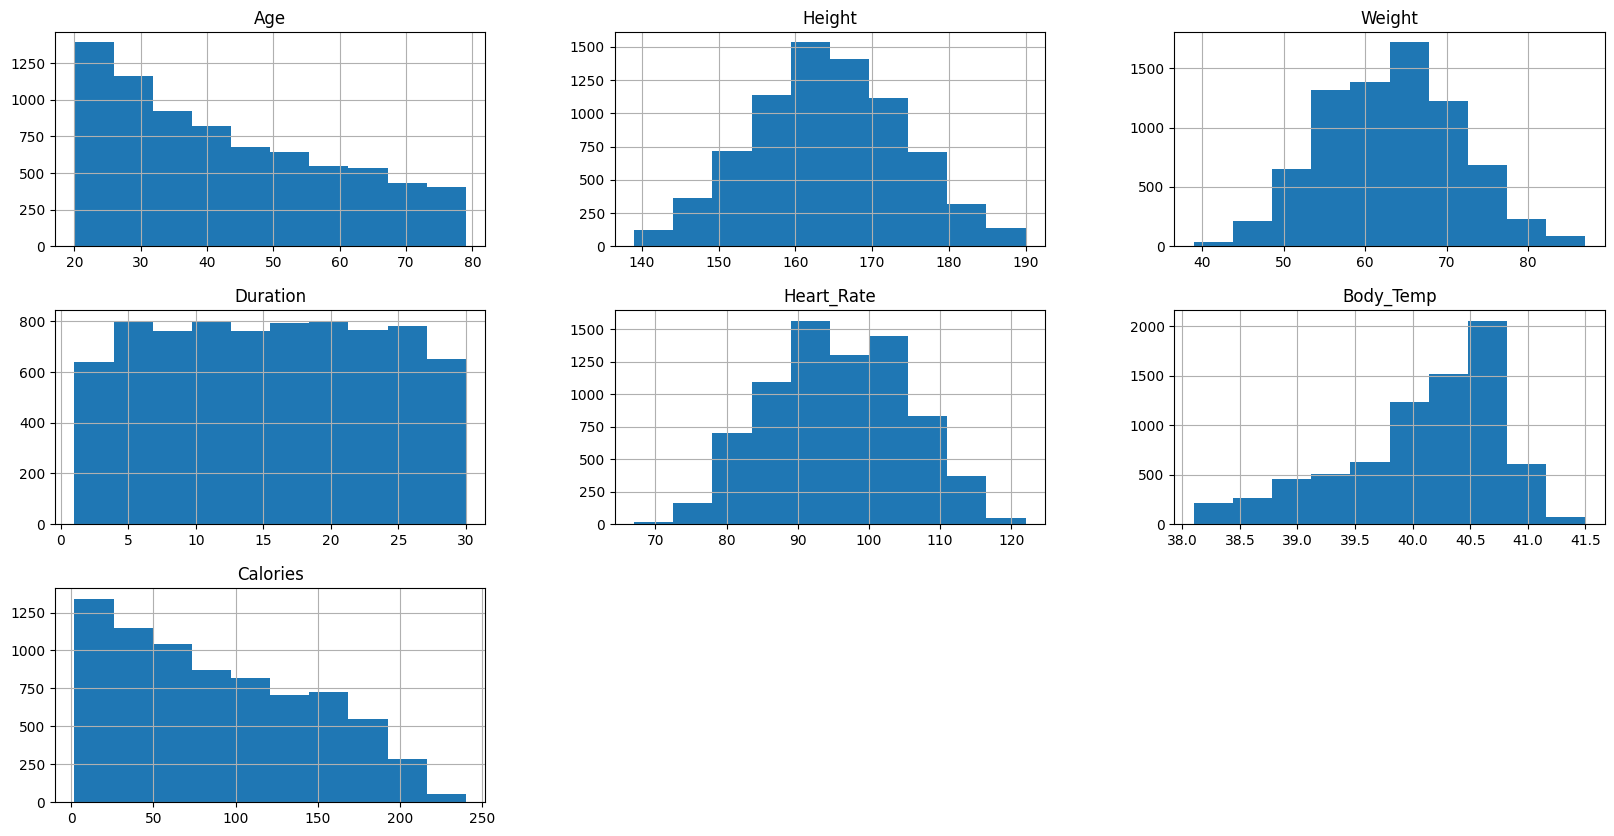

In [37]:
# see the distribution of the data
female_data.hist(figsize=(20, 10))
plt.show()

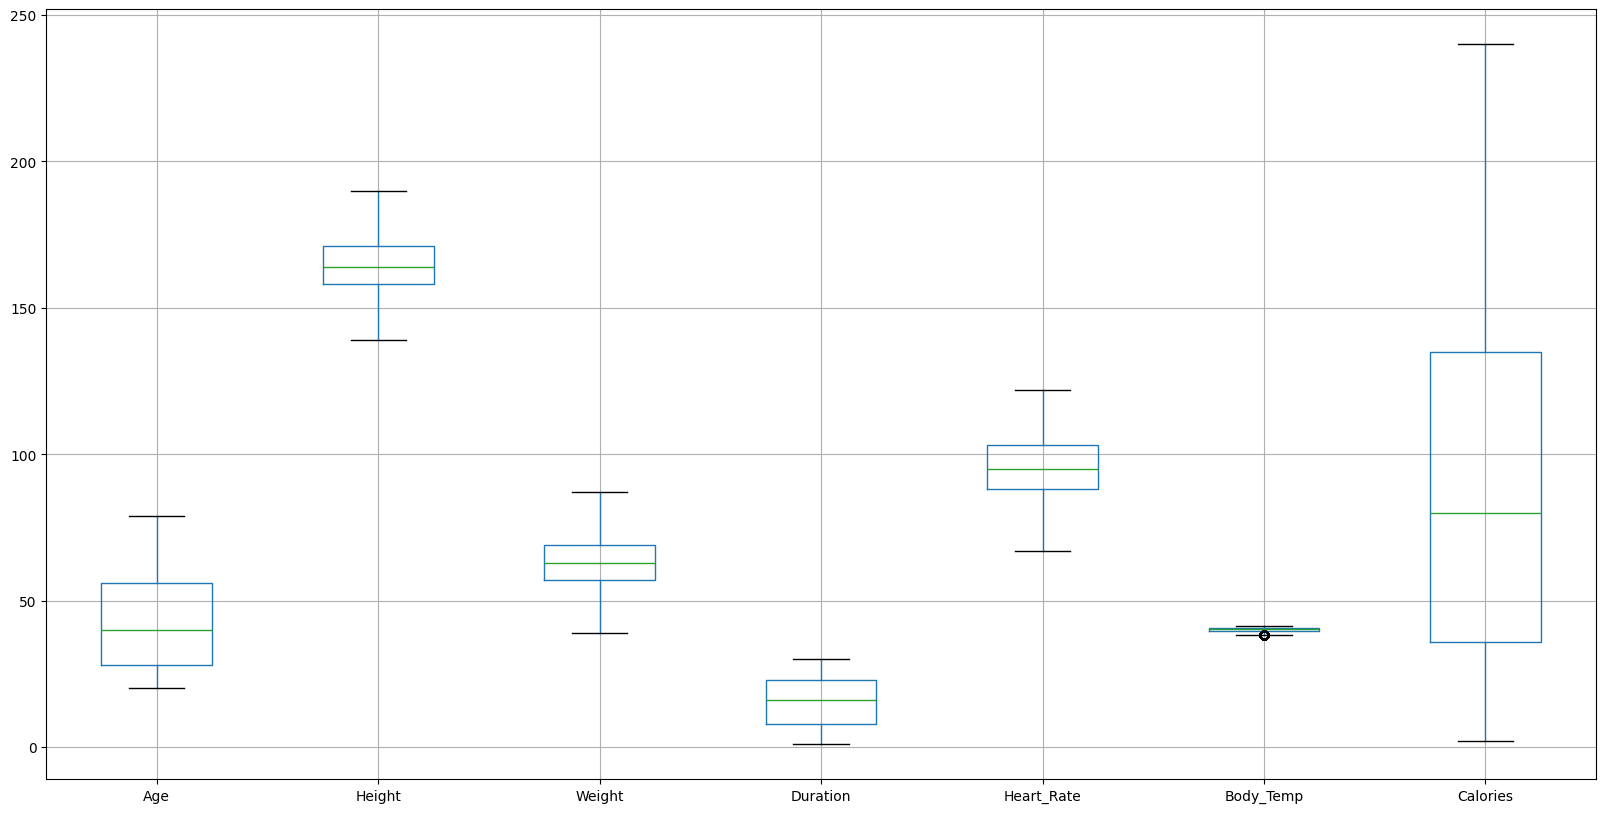

In [38]:
female_data.boxplot(figsize=(20, 10))
plt.show()

now our data is cleaned, I'll combine both dataframes to one called data

In [39]:
# Combine the male_data and female_data dataframes
data = pd.concat([male_data, female_data], ignore_index=True)

# Shuffle the combined dataframe
data = data.sample(frac=1).reset_index(drop=True)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,12290506,male,58,181.0,84.0,11,78.0,39.9,35
1,17559247,male,35,193.0,90.0,23,97.0,40.7,117
2,18746467,male,62,196.0,93.0,17,97.0,40.6,110
3,12150397,female,29,169.0,69.0,15,97.0,40.4,76
4,19380876,female,33,177.0,72.0,14,92.0,40.3,64
...,...,...,...,...,...,...,...,...,...
14995,12395025,female,25,163.0,63.0,15,96.0,39.7,74
14996,14110746,male,70,179.0,85.0,15,92.0,40.1,89
14997,19212490,male,26,198.0,102.0,14,93.0,40.3,60
14998,10811092,female,69,169.0,67.0,29,111.0,40.7,211


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  object 
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.0+ MB


just I want to see featuers correlation

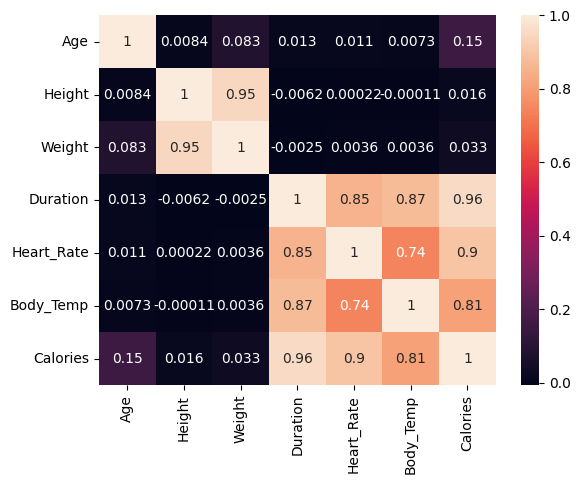

In [45]:
sns.heatmap(data.loc[:, 'Age':'Calories'].corr(), annot=True)
plt.show()

we'll exclude eather height , and body_temp from our featuers

and that's every thing about studying the data and clean it.
now we'll save it as a csv file called 'cleaned_calories_burn' to use it to build models.

In [46]:
data.to_csv(r'D:\calories_burn\dataset\cleaned_data\cleaned_calories_burn.csv', index=False)

## :)